In [11]:
from mlchartist.array_builder import full_dataset_randomised_arrays #full_dataset_randomised_arrays
from mlchartist.preprocessing import train_test_split, thresholds_encoding

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import joblib
import os

from tensorflow.keras import models

# Preprocessing

## Importing NASDAQ_100 Files

In [2]:
# Reads Nasdaq 100 components

nasdaq100 = pd.read_csv('../../raw_data/metadata/nasdaq100.csv', header=None)

In [3]:
nasdaq100_list = list(nasdaq100.values.flatten())

In [4]:
# Samples n random companies from Nasdaq 100 list

rand_tickers = random.sample(nasdaq100_list, 5)

In [5]:
joined_df = pd.DataFrame()

# Takes nrows from history from each company from the sample
nrows = 3000

for ticker in rand_tickers:
    ticker_path = '../../raw_data/processed/' + ticker.strip().lower() + '.csv'
    ticker_df = pd.read_csv(ticker_path, nrows=nrows)
    joined_df = joined_df.append(ticker_df)
    

## Stocks in DataFrame

In [6]:
# Prints sample tickers list

for tick in rand_tickers:
    print(tick)

EXPE
LRCX
NTES
CSX
ILMN


## Threshold Encoding

In [7]:
joined_df['date'] = pd.to_datetime(joined_df['date'])

#FIVE_TR = 0.0006
#TEN_TR = 0.0012
#TWENTY_TR = 0.0024

# Drops 'ADI' and 'OBV' from input columns
# INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ADI','OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']
INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']

joined_df = thresholds_encoding(joined_df)

#joined_df['5D_return_bin'] = (joined_df['5TD_return'] >= FIVE_TR)
#joined_df['10D_return_bin'] = (joined_df['10TD_return'] >= TEN_TR)
#joined_df['20D_return_bin'] = (joined_df['20TD_return'] >= TWENTY_TR)

In [8]:
joined_df.head()

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,...,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return,5D_return_bin,10D_return_bin,20D_return_bin
0,EXPE,2005-09-06,42.734140,63.509545,76.974787,9.709287e+06,-15830231,0.722569,20.690961,14.022898,...,-0.391318,-0.000835,-0.052233,-0.067810,-0.012471,-0.011127,0.022509,0,0,0
1,EXPE,2005-09-07,46.178586,75.398633,75.161786,9.834478e+06,-14344471,0.715886,20.534173,13.482935,...,-0.363099,-0.020659,-0.073085,-0.098226,0.008501,-0.005379,0.038664,0,0,0
2,EXPE,2005-09-08,49.184755,70.570202,69.826127,9.697715e+06,-12954570,0.727180,19.480802,15.881389,...,-0.333236,-0.046369,-0.097911,-0.107436,0.007698,0.008681,0.039140,0,0,0
3,EXPE,2005-09-09,43.299838,48.681790,64.883542,9.915172e+06,-17440639,0.721595,19.025014,14.811879,...,-0.308845,-0.048118,-0.089889,-0.088905,-0.017261,-0.007035,-0.004311,0,0,0
4,EXPE,2005-09-12,44.007176,50.585336,56.612443,8.500761e+06,-15246452,0.725124,17.675142,17.793435,...,-0.287900,-0.047397,-0.093320,-0.081336,0.001722,-0.012034,-0.000491,0,0,0


## Data Visualisation

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/bo

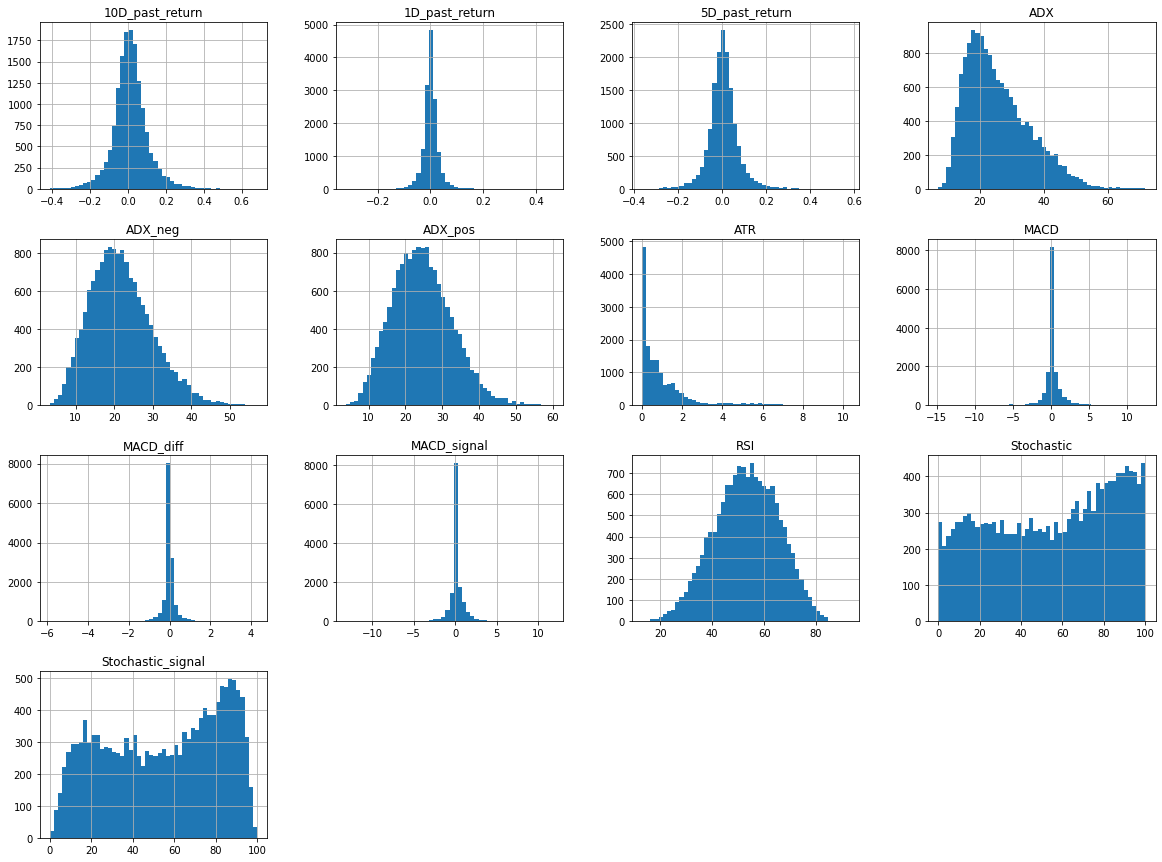

In [9]:
# Plots distribution of the input df without removing outliers

joined_df[INPUT_COLS].hist(figsize=(20, 15), bins=50)
plt.show()

## Embedding

### Embedding Preprocessing

In [24]:
joined_df[:5].drop(columns=['date', '5D_return_bin' , '10D_return_bin' , '20D_return_bin'])

,ticker,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return
0,EXPE,42.734140,63.509545,76.974787,9.709287e+06,-15830231,0.722569,20.690961,14.022898,20.994964,-0.277004,0.114314,-0.391318,-0.000835,-0.052233,-0.067810,-0.012471,-0.011127,0.022509
1,EXPE,46.178586,75.398633,75.161786,9.834478e+06,-14344471,0.715886,20.534173,13.482935,19.602367,-0.250224,0.112875,-0.363099,-0.020659,-0.073085,-0.098226,0.008501,-0.005379,0.038664
2,EXPE,49.184755,70.570202,69.826127,9.697715e+06,-12954570,0.727180,19.480802,15.881389,17.832398,-0.213786,0.119450,-0.333236,-0.046369,-0.097911,-0.107436,0.007698,0.008681,0.039140
3,EXPE,43.299838,48.681790,64.883542,9.915172e+06,-17440639,0.721595,19.025014,14.811879,19.277514,-0.211281,0.097564,-0.308845,-0.048118,-0.089889,-0.088905,-0.017261,-0.007035,-0.004311
4,EXPE,44.007176,50.585336,56.612443,8.500761e+06,-15246452,0.725124,17.675142,17.793435,17.748366,-0.204119,0.083781,-0.287900,-0.047397,-0.093320,-0.081336,0.001722,-0.012034,-0.000491


In [22]:
joined_df.describe()

,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,...,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return,5D_return_bin,10D_return_bin,20D_return_bin
count,15000.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,53.185938,54.683897,54.696552,5.551265e+07,5.253682e+08,1.007195,25.543726,24.495472,21.809008,0.168581,...,0.166828,0.006790,0.013235,0.026506,0.001383,0.006851,0.013488,0.530333,0.546667,0.577733
std,12.360950,29.753463,27.675500,2.382615e+08,4.993501e+08,1.394583,9.839694,8.009109,7.943869,1.400980,...,1.317447,0.067996,0.093099,0.132599,0.030679,0.068010,0.093178,0.499096,0.497834,0.493937
min,12.967990,0.000000,0.000000,-5.208644e+08,-8.665574e+07,0.008254,6.966032,3.855319,3.337453,-14.806819,...,-13.141762,-0.363020,-0.412269,-0.495251,-0.319309,-0.363020,-0.412269,0.000000,0.000000,0.000000
25%,44.681479,28.238931,29.778688,-2.619868e+07,1.932512e+08,0.106528,17.956708,18.709589,16.032753,-0.066497,...,-0.057162,-0.027941,-0.036733,-0.046580,-0.012281,-0.027873,-0.036590,0.000000,0.000000,0.000000
50%,53.398430,57.791708,57.623414,8.102705e+07,3.533254e+08,0.553692,23.492767,24.029580,21.048276,0.030283,...,0.031403,0.004977,0.009632,0.022406,0.000000,0.005027,0.009852,1.000000,1.000000,1.000000
75%,62.292830,81.525470,80.142921,2.358983e+08,7.632566e+08,1.317764,31.528766,29.697733,26.781314,0.396850,...,0.388583,0.038673,0.058610,0.093757,0.014175,0.038766,0.058873,1.000000,1.000000,1.000000
max,92.723690,100.000000,100.000000,5.232538e+08,2.144365e+09,10.303264,71.639701,60.101104,57.017484,12.361145,...,11.815703,0.577686,0.680174,1.167321,0.463253,0.577686,0.680174,1.000000,1.000000,1.000000


In [23]:
joined_df.nunique()

ticker                   5
date                  8473
RSI                  14449
Stochastic           14012
Stochastic_signal    14889
ADI                  14969
OBV                  15000
ATR                  15000
ADX                  15000
ADX_pos              14998
ADX_neg              14997
MACD                 15000
MACD_diff            15000
MACD_signal          15000
5TD_return           14334
10TD_return          14489
20TD_return          14606
1D_past_return       13799
5D_past_return       14333
10D_past_return      14487
5D_return_bin            2
10D_return_bin           2
20D_return_bin           2
dtype: int64

**Transforming float values to int values by multiplying them by 10^6 in order to keep precision**

In [41]:
prepro_df = joined_df[:5].drop(columns=['date', '5D_return_bin' , '10D_return_bin' , '20D_return_bin'])

list_df=

for col in list(prepro_df.drop(columns='ticker')):
    prepro_df[col] = prepro_df[col].apply(lambda x: abs(int(x * 10**6)))
    prepro_df[col] = prepro_df[col].astype(str)
    np.array(prepro_df[])

In [42]:
prepro_df

,ticker,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return
0,EXPE,42734140,63509544,76974787,9709287179081,15830231000000,722569,20690961,14022897,20994964,277003,114313,391317,835,52233,67809,12470,11127,22509
1,EXPE,46178586,75398633,75161786,9834478403247,14344471000000,715885,20534173,13482935,19602367,250223,112875,363098,20658,73085,98226,8500,5379,38663
2,EXPE,49184754,70570202,69826126,9697714689288,12954570000000,727179,19480801,15881389,17832398,213786,119449,333236,46368,97911,107436,7698,8681,39139
3,EXPE,43299838,48681790,64883541,9915172253022,17440639000000,721595,19025014,14811878,19277513,211281,97564,308845,48118,89889,88905,17261,7035,4310
4,EXPE,44007175,50585335,56612442,8500761177795,15246452000000,725124,17675142,17793435,17748365,204118,83781,287899,47396,93320,81335,1722,12034,490


In [49]:
embed_test_df = prepro_df[:5]


#embed_test_df = 
list(np.array(prepro_df[:5]))[0][0] = '007'
list(np.array(prepro_df[:5]))[0][0]

'EXPE'

In [ ]:
value_to_id = {}
iter_ = 1
for sentence in X_clean_train:
    for word in sentence:
        if word in word_to_id:
            continue
        word_to_id[word] = iter_
        iter_ += 1

In [39]:
embed_test_df = prepro_df[:5]
embed_test_df['ticker']=0

model = Sequential()
model.add(layers.Embedding(joined_df.ticker.nunique()+1, 64, input_length=19))
input_array = np.array(embed_test_df)
model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)

InvalidArgumentError:  indices[0,1] = 42734140 is not in [0, 6)
	 [[node sequential_7/embedding_5/embedding_lookup (defined at <ipython-input-39-c8762814025c>:8) ]] [Op:__inference_predict_function_477]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_7/embedding_5/embedding_lookup:
 sequential_7/embedding_5/embedding_lookup/469 (defined at /home/bob/.pyenv/versions/3.7.7/lib/python3.7/contextlib.py:112)

Function call stack:
predict_function


### Embedding Model

In [35]:
def embedding(df):
    """
    Embed the stocks ticker and returns a DataFrame with 
        the ticker embedded value
    """
    model = Sequential()
    model.add(layers.Embedding(df.ticker.nunique()+1, 64, input_lenght=22))
    model.compile('rmsprop', 'mse')
    return model    

## `train_x`, `train_y`, `test_x`, `test_y` Arrays Building

In [19]:

TARGET_COLS=['10D_return_bin']
outlier_validation={'1D_past_return': [-0.3, 0.3]}

stride = 1


train_x, train_y, test_x, test_y, scaler = full_dataset_randomised_arrays(joined_df, 
                                                                                stride=stride, 
                                                                                input_cols=INPUT_COLS, 
                                                                                outlier_threshold=1, 
                                                                                outlier_validation=outlier_validation, 
                                                                                check_train_outliers=True,
                                                                                check_test_outliers=False, 
                                                                                target_col=TARGET_COLS, 
                                                                                time_window=30,
                                                                                test_set_size='2Y')

print('')
print('')
print('### Stats ###')
print('train_x', train_x.shape)
print('train_y', train_y.shape)
print('test_x', test_x.shape)
print('test_y', test_y.shape)
print('scaler', scaler)

print('')
print('')
print('### Validation ###')


5 Companies in Dataset
Starting MXIM: Company 1 of 5
Starting UAL: Company 2 of 5
Starting ISRG: Company 3 of 5
Starting ULTA: Company 4 of 5
Starting MDLZ: Company 5 of 5
All Companies Completed

Processing Stats: {'MXIM': {'train_possible_windows': 2687.0, 'train_outliers': 29, 'train_windows': 2658, 'test_possible_windows': 313.0, 'test_outliers': 29, 'test_windows': 284}, 'UAL': {'train_possible_windows': 2721.0, 'train_outliers': 123, 'train_windows': 2598, 'test_possible_windows': 279.0, 'test_outliers': 29, 'test_windows': 250}, 'ISRG': {'train_possible_windows': 2698.0, 'train_outliers': 59, 'train_windows': 2639, 'test_possible_windows': 302.0, 'test_outliers': 29, 'test_windows': 273}, 'ULTA': {'train_possible_windows': 2531.0, 'train_outliers': 29, 'train_windows': 2502, 'test_possible_windows': 469.0, 'test_outliers': 29, 'test_windows': 440}, 'MDLZ': {'train_possible_windows': 2548.0, 'train_outliers': 29, 'train_windows': 2519, 'test_possible_windows': 452.0, 'test_outlie

## `X_train` & `y_train` Arrays Random Sampling

In [20]:
# Samples n rows of train_x

indx = list(range(len(train_x)))
sample_indx = random.sample(indx, 10000)
X_train_sample =  train_x[[sample_indx], :][0]
y_train_sample = train_y[[sample_indx]]

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [21]:
y_train_sample.shape

(10000, 1)

In [22]:
test_y.shape

(1670, 1)

# Modeling

## Model (commented)

from tensorflow.keras.metrics import Precision
from tensorflow.keras import regularizers
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam, Adamax

optim = RMSprop(learning_rate=0.0001)
precision = Precision()

def init_model():
    model = Sequential()
    reg_l1 = regularizers.l1(0.001)
    reg_l2 = regularizers.l2(0.001)
    reg_l1_l2 = regularizers.l1_l2(l1=0.001, l2=0.001)
    model.add(layers.LSTM(200, return_sequences=True, input_shape=(30,13), activation='tanh'))
    model.add(layers.LSTM(200, activation='tanh'))
    model.add(layers.Dropout(0.3))
    #model.add(layers.BatchNormalization())
    model.add(layers.Dense(200, activation='relu', kernel_regularizer=reg_l1))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation='relu', bias_regularizer=reg_l2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(50, activation='relu', activity_regularizer=reg_l1_l2))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=[precision, 'accuracy'])
    
    return model

model = init_model()

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

model.fit(train_x, train_y, 
          epochs=500, 
          batch_size=16,
          validation_split=0.2,
          callbacks=[es])

## Balance of `train_y` and `test_y`

In [23]:
train_y.sum()/len(train_y)

0.5587643233199133

In [24]:
test_y.sum()/len(test_y)

0.5383233532934132

## Trained Model Loading

In [25]:
!ls ../../models/

Nasdaq_100_150k  Nasdaq_random_50  scaler


In [29]:
model = models.load_model('../../models/Nasdaq_100_150k/')

In [30]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 30, 200)           171200    
_________________________________________________________________
lstm_47 (LSTM)               (None, 200)               320800    
_________________________________________________________________
dropout_69 (Dropout)         (None, 200)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 200)               800       
_________________________________________________________________
dense_92 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_70 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 100)             

## Model evaluation

In [34]:
results = model.evaluate(test_x, test_y)
results

53/53 [==============================] - 2s 34ms/step - loss: 0.7501 - precision_24: 0.7096 - accuracy: 0.6587


[0.7501091957092285, 0.709554135799408, 0.658682644367218]

In [36]:
results[0]

0.7501091957092285

# Results Saving

## Current results in `df`

In [91]:
df = pd.DataFrame(columns=['n_companies', 'companies_list', 'benchmark', 'loss', 'precision', 'accuracy'])

In [92]:
#len(rand_tickers)

In [93]:
df['n_companies'] = int(len(rand_tickers))
df['companies_list'] = [', '.join(rand_tickers)]
df['benchmark'] = test_y.sum()/len(test_y)
df['loss'] = results[0]
df['precision'] = results[1]
df['accuracy'] = results[2]

In [94]:
df

,n_companies,companies_list,benchmark,loss,precision,accuracy
0,NaN,"MXIM, UAL, ISRG, ULTA, MDLZ",0.538323,0.750109,0.709554,0.658683


## Loading Previous Results

if 'charles_NASDAQ100_model_results' in os.listdir('stock_model_results/'):
    previous_results_df = joblib.load('stock_model_results/charles_NASDAQ100_model_results')
else:
    previous_results_df = pd.DataFrame(columns=['n_companies', 'companies_list', 'benchmark', 'loss', 'precision', 'accuracy'])

## Saving Current Results in New File on the Disk

saved_results_df = previous_results_df.append(df)

joblib.dump(saved_results_df,'stock_model_results/charles_NASDAQ100_model_results')

saving_process_test_df = joblib.load('stock_model_results/charles_NASDAQ100_model_results')
saving_process_test_df

# Testing Function 

In [117]:
from mlchartist.array_builder import full_dataset_randomised_arrays_#, full_dataset_randomised_arrays
from mlchartist.preprocessing import train_test_split, thresholds_encoding

import pandas as pd
import numpy as np
import random
import joblib
import os

from tensorflow.keras import models
from termcolor import colored

def model_testing_function(n_companies=5, n_test=25, trained_model_path='', rand=True, stocks_to_train=[],
                           nrows = 3000, verbose=0, new_save=False,
                           load_save_path='stock_model_results/charles_NASDAQ100_model_results',
                           save_path='stock_model_results/charles_NASDAQ100_model_results',
                           r5d=0.0006, same_thresholds=True, r10d=0.0012, r20d=0.0024, INPUT_COLS=[],
                           TARGET_COLS=['10D_return_bin'], outlier_validation={'1D_past_return': [-0.3, 0.3]},
                           stride = 1):
    """
    Test `n_test` times the trained model saved for `n_companies`
    
    If  `rand` set to False, test on the `stocks_to_train` list
    
    You have access to some of the function parameters, see doc of the following functions:
        -`thresholds_encoding()`
        -`full_dataset_randomised_arrays_()`
        
        (see below to see other default values of `full_dataset_randomised_arrays_()`)
    
    Other parameters ar
    
    If you leave INPUT_COLS empty, its default value will be:
        ['RSI', 'Stochastic', 'Stochastic_signal', 'ATR', 'ADX',
        'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal',
        '1D_past_return', '5D_past_return', '10D_past_return']
    
    Other parameters of `full_dataset_randomised_arrays_()`:
        -outlier_threshold=1
        -check_train_outliers=True
        -check_test_outliers=False
        -time_window=30
        -test_set_size='2Y'
    
    """
    
    # Importing ticker list
    nasdaq100 = pd.read_csv('../../raw_data/metadata/nasdaq100.csv', header=None)
    nasdaq100_list = list(nasdaq100.values.flatten())
        
    
    joined_df = pd.DataFrame()

    for i in range(n_test):
        
        # Randomly select the stocks
        rand_tickers = random.sample(nasdaq100_list, n_companies)
        
        
        # Takes nrows from history from each company from the sample
        joined_df = pd.DataFrame()
        for ticker in rand_tickers:
            ticker_path = '../../raw_data/processed/' + ticker.strip().lower() + '.csv'
            ticker_df = pd.read_csv(ticker_path, nrows=nrows)
            joined_df = joined_df.append(ticker_df)

        if verbose ==2:
            for tick in rand_tickers:
                print(tick)

        joined_df['date'] = pd.to_datetime(joined_df['date'])

        # Drops 'ADI' and 'OBV' from input columns
        # INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ADI','OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']
        if len(INPUT_COLS) == 0:
            INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']

        joined_df = thresholds_encoding(joined_df, r5d=r5d, same_thresholds=same_thresholds, r10d=r10d, r20d=r20d)
        
        print('full_dataset_randomised_arrays_ verbose():')
        train_x, train_y, test_x, test_y, scaler = full_dataset_randomised_arrays_(joined_df, 
                                                                                        stride=stride, 
                                                                                        input_cols=INPUT_COLS, 
                                                                                        outlier_threshold=1, 
                                                                                        outlier_validation=outlier_validation, 
                                                                                        check_train_outliers=True,
                                                                                        check_test_outliers=False, 
                                                                                        target_col=TARGET_COLS, 
                                                                                        time_window=30,
                                                                                        test_set_size='2Y')

        if verbose == 2: 
            print('')
            print('')
            print('### Stats ###')
            print('train_x', train_x.shape)
            print('train_y', train_y.shape)
            print('test_x', test_x.shape)
            print('test_y', test_y.shape)
            print('scaler', scaler)

            print('')
            print('')
            print('### Validation ###')
            
        # Samples n rows of train_x
        indx = list(range(len(train_x)))
        sample_indx = random.sample(indx, 10000)
        X_train_sample =  train_x[[sample_indx], :][0]
        y_train_sample = train_y[[sample_indx]]

        if verbose >=1:
            print(f"train_y.sum()/len(train_y): {train_y.sum()/len(train_y)}")

        # Model loading
        model = models.load_model('../../models/Nasdaq_100_150k/')
        results = model.evaluate(test_x, test_y, verbose=0)

        if verbose >= 1:
            print(results)
        if verbose == 2:
            print(model.summary())

        # Current Results in `df`
        df = pd.DataFrame(columns=['n_companies', 'companies_list', 'benchmark', 'loss', 'precision', 'accuracy'])
        df['n_companies'] = int(len(rand_tickers))
        df['companies_list'] = [', '.join(rand_tickers)]
        df['benchmark'] = test_y.sum()/len(test_y)
        df['loss'] = results[0]
        df['precision'] = results[1]
        df['accuracy'] = results[2]

        if verbose >=1:
            print(df)
            print()

        # Loading previous results
        if 'charles_NASDAQ100_model_results' in os.listdir('stock_model_results/'):
            previous_results_df = joblib.load('stock_model_results/charles_NASDAQ100_model_results')
        else:
            previous_results_df = pd.DataFrame(columns=['n_companies', 'companies_list', 'benchmark', 'loss', 'precision', 'accuracy'])

        # Saving Current Results
        saved_results_df = previous_results_df.append(df)
        saved_results_df.reset_index(inplace=True)
        joblib.dump(saved_results_df,'stock_model_results/charles_NASDAQ100_model_results')
        
        print(colored(f"{i} iterations done on {len(n_test)}", 'green'))
        print()
        print()
    
    return saved_results_df

In [112]:
comprehensive_model_result = model_testing_function()

full_dataset_randomised_arrays_ verbose():
5 Companies in Dataset
Starting AVGO: Company 1 of 5
Starting ADBE: Company 2 of 5
Starting ASML: Company 3 of 5
Starting QCOM: Company 4 of 5
Starting GOOG: Company 5 of 5
All Companies Completed

Processing Stats: {'AVGO': {'train_possible_windows': 2334.0, 'train_outliers': 29, 'train_windows': 2305, 'test_possible_windows': 500.0, 'test_outliers': 29, 'test_windows': 471}, 'ADBE': {'train_possible_windows': 2592.0, 'train_outliers': 89, 'train_windows': 2503, 'test_possible_windows': 408.0, 'test_outliers': 29, 'test_windows': 379}, 'ASML': {'train_possible_windows': 2698.0, 'train_outliers': 59, 'train_windows': 2639, 'test_possible_windows': 302.0, 'test_outliers': 29, 'test_windows': 273}, 'QCOM': {'train_possible_windows': 2499.0, 'train_outliers': 119, 'train_windows': 2380, 'test_possible_windows': 501.0, 'test_outliers': 29, 'test_windows': 472}, 'GOOG': {'train_possible_windows': 1167.0, 'train_outliers': 29, 'train_windows': 1138,

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:109: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


65/65 [==============================] - 2s 33ms/step - loss: 1.0171 - precision_24: 0.6184 - accuracy: 0.5479
full_dataset_randomised_arrays_ verbose():
5 Companies in Dataset
Starting WDC: Company 1 of 5
Starting REGN: Company 2 of 5
Starting LRCX: Company 3 of 5
Starting EA: Company 4 of 5
Starting MELI: Company 5 of 5
All Companies Completed

Processing Stats: {'WDC': {'train_possible_windows': 2698.0, 'train_outliers': 29, 'train_windows': 2669, 'test_possible_windows': 302.0, 'test_outliers': 29, 'test_windows': 273}, 'REGN': {'train_possible_windows': 2697.0, 'train_outliers': 29, 'train_windows': 2668, 'test_possible_windows': 303.0, 'test_outliers': 29, 'test_windows': 274}, 'LRCX': {'train_possible_windows': 2682.0, 'train_outliers': 59, 'train_windows': 2623, 'test_possible_windows': 318.0, 'test_outliers': 29, 'test_windows': 289}, 'EA': {'train_possible_windows': 1734.0, 'train_outliers': 29, 'train_windows': 1705, 'test_possible_windows': 500.0, 'test_outliers': 29, 'test

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:109: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


53/53 [==============================] - 2s 38ms/step - loss: 0.7699 - precision_24: 0.7382 - accuracy: 0.6724
full_dataset_randomised_arrays_ verbose():
5 Companies in Dataset
Starting CSCO: Company 1 of 5
Starting LRCX: Company 2 of 5
Starting FISV: Company 3 of 5
Starting AVGO: Company 4 of 5
Starting CTSH: Company 5 of 5
All Companies Completed

Processing Stats: {'CSCO': {'train_possible_windows': 2684.0, 'train_outliers': 29, 'train_windows': 2655, 'test_possible_windows': 316.0, 'test_outliers': 29, 'test_windows': 287}, 'LRCX': {'train_possible_windows': 2682.0, 'train_outliers': 59, 'train_windows': 2623, 'test_possible_windows': 318.0, 'test_outliers': 29, 'test_windows': 289}, 'FISV': {'train_possible_windows': 2688.0, 'train_outliers': 29, 'train_windows': 2659, 'test_possible_windows': 312.0, 'test_outliers': 29, 'test_windows': 283}, 'AVGO': {'train_possible_windows': 2334.0, 'train_outliers': 29, 'train_windows': 2305, 'test_possible_windows': 500.0, 'test_outliers': 29,

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:109: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


51/51 [==============================] - 2s 33ms/step - loss: 1.0502 - precision_24: 0.5539 - accuracy: 0.5047
full_dataset_randomised_arrays_ verbose():
5 Companies in Dataset
Starting NVDA: Company 1 of 5
Starting CTX: Company 2 of 5
Starting INTC: Company 3 of 5
Starting BID: Company 4 of 5
Starting BIIB: Company 5 of 5
All Companies Completed

Processing Stats: {'NVDA': {'train_possible_windows': 2720.0, 'train_outliers': 209, 'train_windows': 2511, 'test_possible_windows': 280.0, 'test_outliers': 29, 'test_windows': 251}, 'CTX': {'train_possible_windows': 2747.0, 'train_outliers': 119, 'train_windows': 2628, 'test_possible_windows': 253.0, 'test_outliers': 29, 'test_windows': 224}, 'INTC': {'train_possible_windows': 2569.0, 'train_outliers': 249, 'train_windows': 2320, 'test_possible_windows': 431.0, 'test_outliers': 29, 'test_windows': 402}, 'BID': {'train_possible_windows': 2587.0, 'train_outliers': 59, 'train_windows': 2528, 'test_possible_windows': 413.0, 'test_outliers': 29, 

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:109: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


53/53 [==============================] - 2s 32ms/step - loss: 1.0642 - precision_24: 0.5428 - accuracy: 0.5245
full_dataset_randomised_arrays_ verbose():
5 Companies in Dataset
Starting KLAC: Company 1 of 5
Starting SWK: Company 2 of 5
Starting HA: Company 3 of 5
Starting EXPE: Company 4 of 5
Starting M: Company 5 of 5
All Companies Completed

Processing Stats: {'KLAC': {'train_possible_windows': 2688.0, 'train_outliers': 29, 'train_windows': 2659, 'test_possible_windows': 312.0, 'test_outliers': 29, 'test_windows': 283}, 'SWK': {'train_possible_windows': 2698.0, 'train_outliers': 89, 'train_windows': 2609, 'test_possible_windows': 302.0, 'test_outliers': 29, 'test_windows': 273}, 'HA': {'train_possible_windows': 2504.0, 'train_outliers': 29, 'train_windows': 2475, 'test_possible_windows': 496.0, 'test_outliers': 29, 'test_windows': 467}, 'EXPE': {'train_possible_windows': 2598.0, 'train_outliers': 29, 'train_windows': 2569, 'test_possible_windows': 402.0, 'test_outliers': 29, 'test_wi

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:109: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


54/54 [==============================] - 2s 37ms/step - loss: 0.9786 - precision_24: 0.5915 - accuracy: 0.5478
full_dataset_randomised_arrays_ verbose():
5 Companies in Dataset
Starting EXC: Company 1 of 5
Starting VRSN: Company 2 of 5
Starting AMD: Company 3 of 5
Starting FISV: Company 4 of 5
Starting AAL: Company 5 of 5
All Companies Completed

Processing Stats: {'EXC': {'train_possible_windows': 2495.0, 'train_outliers': 29, 'train_windows': 2466, 'test_possible_windows': 505.0, 'test_outliers': 29, 'test_windows': 476}, 'VRSN': {'train_possible_windows': 2712.0, 'train_outliers': 89, 'train_windows': 2623, 'test_possible_windows': 288.0, 'test_outliers': 29, 'test_windows': 259}, 'AMD': {'train_possible_windows': 2695.0, 'train_outliers': 89, 'train_windows': 2606, 'test_possible_windows': 305.0, 'test_outliers': 29, 'test_windows': 276}, 'FISV': {'train_possible_windows': 2688.0, 'train_outliers': 29, 'train_windows': 2659, 'test_possible_windows': 312.0, 'test_outliers': 29, 'tes

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:109: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


56/56 [==============================] - 2s 33ms/step - loss: 1.1389 - precision_24: 0.5466 - accuracy: 0.5184
full_dataset_randomised_arrays_ verbose():
5 Companies in Dataset
Starting KLAC: Company 1 of 5
Starting INT: Company 2 of 5
Starting AMD: Company 3 of 5
Starting KHC: Company 4 of 5
Starting PYPL: Company 5 of 5
All Companies Completed

Processing Stats: {'KLAC': {'train_possible_windows': 2688.0, 'train_outliers': 29, 'train_windows': 2659, 'test_possible_windows': 312.0, 'test_outliers': 29, 'test_windows': 283}, 'INT': {'train_possible_windows': 2684.0, 'train_outliers': 59, 'train_windows': 2625, 'test_possible_windows': 316.0, 'test_outliers': 29, 'test_windows': 287}, 'AMD': {'train_possible_windows': 2695.0, 'train_outliers': 89, 'train_windows': 2606, 'test_possible_windows': 305.0, 'test_outliers': 29, 'test_windows': 276}, 'KHC': {'train_possible_windows': 847.0, 'train_outliers': 29, 'train_windows': 818, 'test_possible_windows': 500.0, 'test_outliers': 29, 'test_w

ValueError: Sample larger than population or is negative

In [115]:
comprehensive_model_result_broken = joblib.load('stock_model_results/charles_NASDAQ100_model_results')

In [116]:
comprehensive_model_result_broken

,n_companies,companies_list,benchmark,loss,precision,accuracy
0,NaN,"ALGN, INCY, SNPS, WDAY, XLNX",0.571779,0.949156,0.637421,0.587730
0,NaN,"NXPI, WDAY, AMZN, ROST, ALGN",0.591757,0.990161,0.618377,0.525202
0,NaN,"AVGO, ADBE, ASML, QCOM, GOOG",0.579380,1.017072,0.618362,0.547919
0,NaN,"WDC, REGN, LRCX, EA, MELI",0.560803,0.769861,0.738239,0.672373
0,NaN,"CSCO, LRCX, FISV, AVGO, CTSH",0.541485,1.050175,0.553936,0.504679
0,NaN,"NVDA, CTXS, INTC, BIDU, BIIB",0.514354,1.064222,0.542819,0.524522
0,NaN,"KLAC, SWKS, HAS, EXPE, MU",0.537923,0.978591,0.591532,0.547841
0,NaN,"EXC, VRSN, AMD, FISV, AAL",0.530878,1.138875,0.546624,0.518414
